In [0]:
import pandas as pd

data = {
    "HostItemID": [15137022, 12346290, 3, 15708051],
    "Cost": [68, 9.33, 2, 59.68],
    "List": [180.41, 25.07, 3.62, 91.05],
    "OnHand": [13, 14, 35, 51],
    "MonthsNoSale": [0, 88, 94, 102],
    "LastSaleDate": ["9/9/2024", "11/10/2023", "1/12/2024", "1/12/2024"],
    "PriorYearSales1": [24, 30, 0, -24],
    "PriorYearSales2": [6, 15, 0, 6],
    "PriorYearSales3": [3, 3, 36, 3],
    "OnOrderQty": [0, 25, 0, 0],
    "BestReorderPoint": [5, 2, 0, 0],
    "SafetyStockLevel": [40, 20, 0, 0],
    "JanSales": [1, 10, 36, 91],
    "FebSales": [2, 15, 0, 0],
    "MarSales": [3, 10, 0, 0],
}

df = pd.DataFrame(data)

df['PriorYearSales'] = df[['PriorYearSales1', 'PriorYearSales2', 'PriorYearSales3']].sum(axis=1)
sales_columns = ['JanSales', 'FebSales', 'MarSales']  # Include the other months as needed
months = ['January', 'February', 'March']  # Include other months here

df_sales = pd.melt(df, id_vars=['HostItemID', 'Cost', 'List', 'OnHand', 'MonthsNoSale', 'LastSaleDate', 'PriorYearSales', 'OnOrderQty', 'BestReorderPoint', 'SafetyStockLevel'], 
                   value_vars=sales_columns, var_name='Month', value_name='Sales')
df_sales['Month'] = df_sales['Month'].map({'JanSales': 'January', 'FebSales': 'February', 'MarSales': 'March'}) 
df_sales['Year'] = 2024 
df_sales['Lag_1'] = df_sales.groupby('HostItemID')['Sales'].shift(1)
df_sales['HolidayFlag'] = 0  # Default to no holiday unless data is provided
df_sales['InventoryDiff_Reorder'] = df_sales['OnHand'] - df_sales['BestReorderPoint']
df_sales['InventoryDiff_SafetyStock'] = df_sales['OnHand'] - df_sales['SafetyStockLevel']
df_sales = df_sales[['HostItemID', 'Cost', 'List', 'OnHand', 'MonthsNoSale', 'LastSaleDate', 'PriorYearSales', 'OnOrderQty', 
                     'BestReorderPoint', 'SafetyStockLevel', 'Month', 'Year', 'Sales', 'Lag_1', 'HolidayFlag', 'InventoryDiff_Reorder', 'InventoryDiff_SafetyStock']]

print(df_sales)

    HostItemID   Cost    List  OnHand  MonthsNoSale LastSaleDate  \
0     15137022  68.00  180.41      13             0     9/9/2024   
1     12346290   9.33   25.07      14            88   11/10/2023   
2            3   2.00    3.62      35            94    1/12/2024   
3     15708051  59.68   91.05      51           102    1/12/2024   
4     15137022  68.00  180.41      13             0     9/9/2024   
5     12346290   9.33   25.07      14            88   11/10/2023   
6            3   2.00    3.62      35            94    1/12/2024   
7     15708051  59.68   91.05      51           102    1/12/2024   
8     15137022  68.00  180.41      13             0     9/9/2024   
9     12346290   9.33   25.07      14            88   11/10/2023   
10           3   2.00    3.62      35            94    1/12/2024   
11    15708051  59.68   91.05      51           102    1/12/2024   

    PriorYearSales  OnOrderQty  BestReorderPoint  SafetyStockLevel     Month  \
0               33           0     

<command-3012329493474955>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['Date'] = pd.to_datetime(part_data[['Year', 'Month']].assign(DAY=1))
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


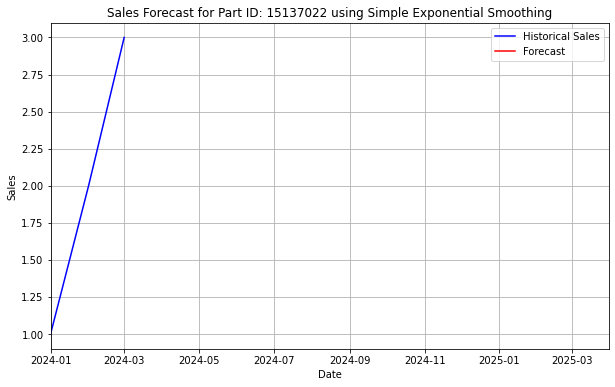

<command-3012329493474955>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['Date'] = pd.to_datetime(part_data[['Year', 'Month']].assign(DAY=1))
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


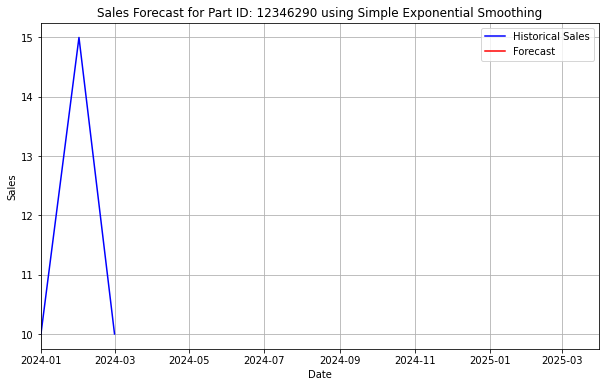

<command-3012329493474955>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['Date'] = pd.to_datetime(part_data[['Year', 'Month']].assign(DAY=1))
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


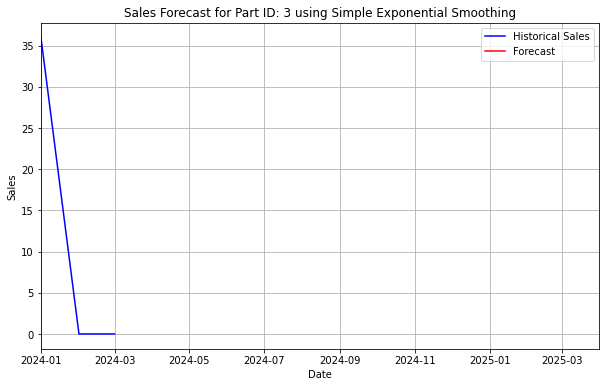

<command-3012329493474955>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_data['Date'] = pd.to_datetime(part_data[['Year', 'Month']].assign(DAY=1))
/databricks/python/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


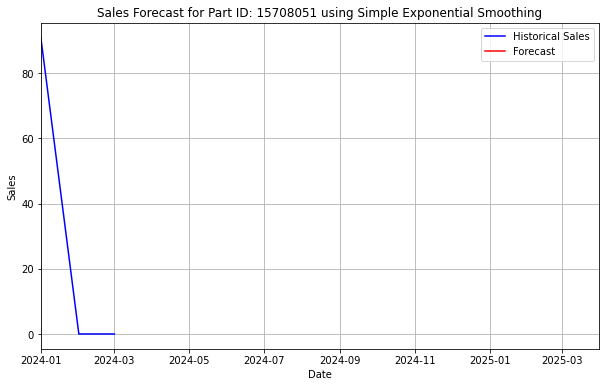

In [0]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt
part_ids = df_sales['HostItemID'].unique()
for part_id in part_ids:
    part_data = df_sales[df_sales['HostItemID'] == part_id]
    
    part_data['Date'] = pd.to_datetime(part_data[['Year', 'Month']].assign(DAY=1))
    part_data = part_data.sort_values('Date')
    
    time_series_data = part_data.set_index('Date')['Sales']
    
    model = SimpleExpSmoothing(time_series_data).fit(smoothing_level=0.2, optimized=False)
    
    forecast = model.forecast(steps=12)
    
    forecast_index = pd.date_range(start=time_series_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])
    
    plt.figure(figsize=(10, 6))
    plt.plot(time_series_data, label='Historical Sales', color='blue')
    plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
    
    plt.xlim([time_series_data.index.min(), forecast_df.index.max()])
    
    plt.title(f'Sales Forecast for Part ID: {part_id} using Simple Exponential Smoothing')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid()
    plt.show()